# SVM exercise

In [59]:
clear ; close all; clc

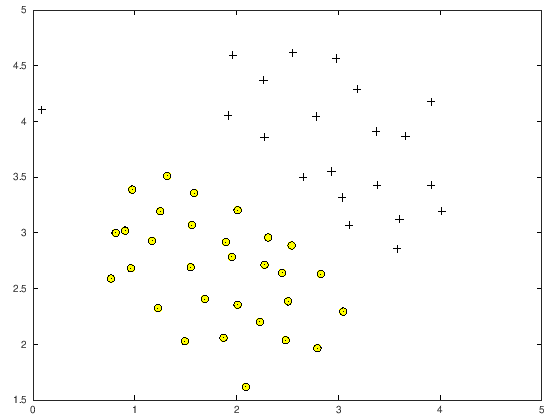

In [60]:
%% =============== Part 1: Loading and Visualizing Data ================
%  We start the exercise by first loading and visualizing the dataset. 
%  The following code will load the dataset into your environment and plot
%  the data.
%

% Load from ex6data1: 
% You will have X, y in your environment
load('ex6data1.mat');

% Plot training data
plotData(X, y);


Training ......................................................................
...............................................................................
...............................................................................
....... Done! 



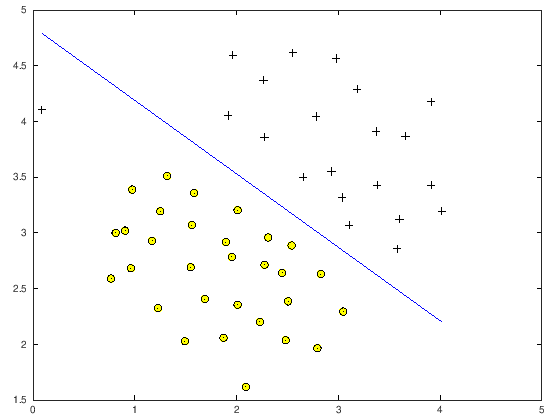

In [61]:
%% ==================== Part 2: Training Linear SVM ====================
%  The following code will train a linear SVM on the dataset and plot the
%  decision boundary learned.
%

% Load from ex6data1: 
% You will have X, y in your environment
load('ex6data1.mat');

% You should try to change the C value below and see how the decision
% boundary varies (e.g., try C = 1000)
C = 1;
model = svmTrain(X, y, C, @linearKernel, 1e-3, 20);
visualizeBoundaryLinear(X, y, model);

In [62]:
%% =============== Part 3: Implementing Gaussian Kernel ===============
%  You will now implement the Gaussian kernel to use
%  with the SVM. You should complete the code in gaussianKernel.m
%

x1 = [1 2 1]; x2 = [0 4 -1]; sigma = 2;
sim = gaussianKernel(x1, x2, sigma);

fprintf(['Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = %f :' ...
         '\n\t%f\n(for sigma = 2, this value should be about 0.324652)\n'], sigma, sim);

Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2.000000 :
	0.324652
(for sigma = 2, this value should be about 0.324652)


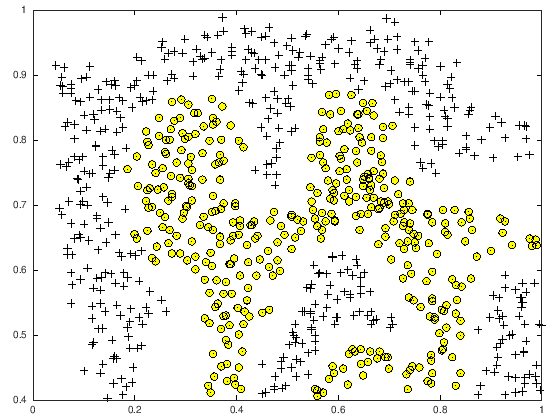

In [63]:
%% =============== Part 4: Visualizing Dataset 2 ================
%  The following code will load the next dataset into your environment and 
%  plot the data. 
%

% Load from ex6data2: 
% You will have X, y in your environment
load('ex6data2.mat');

% Plot training data
plotData(X, y);


Training ......................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
............ Done! 



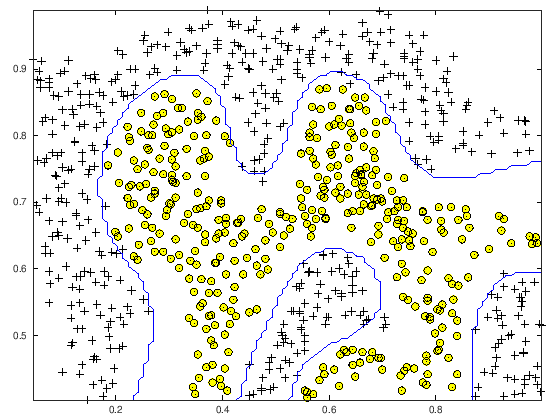

In [64]:
%% ========== Part 5: Training SVM with RBF Kernel (Dataset 2) ==========
%  After you have implemented the kernel, we can now use it to train the 
%  SVM classifier.
% 

% Load from ex6data2: 
% You will have X, y in your environment
load('ex6data2.mat');

% SVM Parameters
C = 1; sigma = 0.1;

% We set the tolerance and max_passes lower here so that the code will run
% faster. However, in practice, you will want to run the training to
% convergence.
model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma)); 
visualizeBoundary(X, y, model);

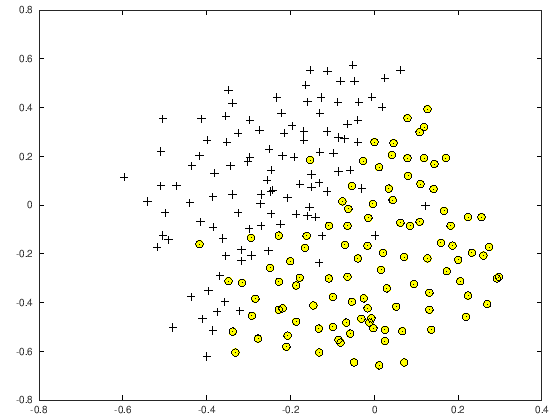

In [65]:
%% =============== Part 6: Visualizing Dataset 3 ================
%  The following code will load the next dataset into your environment and 
%  plot the data. 
%

% Load from ex6data3: 
% You will have X, y in your environment
load('ex6data3.mat');

% Plot training data
plotData(X, y);


Training ......... Done! 


Training ........................................... Done! 


Training ......................... Done! 


Training .................................................... Done! 


Training .................................. Done! 


Training .......................................................... Done! 


Training ....................................................... Done! 


Training ....................................... Done! 


Training ......... Done! 


Training ......................................................... Done! 


Training .................................................. Done! 


Training ......................................................................
................. Done! 


Training .......................................... Done! 


Training .............................. Done! 


Training ..................................... Done! 


Training .............................................. Done! 


Training ......... Do

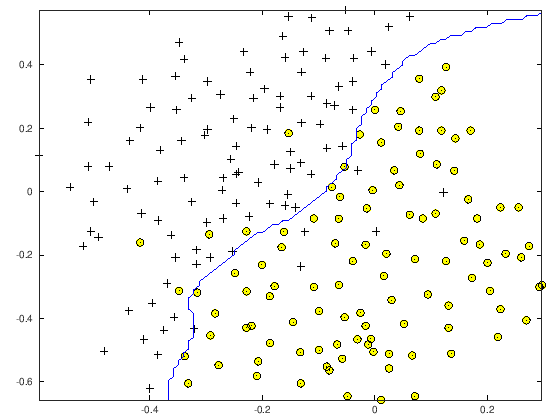

In [102]:
%% ========== Part 7: Training SVM with RBF Kernel (Dataset 3) ==========

%  This is a different dataset that you can use to experiment with. Try
%  different values of C and sigma here.
% 

% Load from ex6data3: 
% You will have X, y in your environment
load('ex6data3.mat');

% Try different SVM Parameters here
[C, sigma] = dataset3Params(X, y, Xval, yval);

% Train the SVM
model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma));
visualizeBoundary(X, y, model);

# Spam classification

In [1]:
clear ; close all; clc

In [2]:
%% ==================== Part 1: Email Preprocessing ====================
%  To use an SVM to classify emails into Spam v.s. Non-Spam, you first need
%  to convert each email into a vector of features. In this part, you will
%  implement the preprocessing steps for each email. You should
%  complete the code in processEmail.m to produce a word indices vector
%  for a given email.

fprintf('\nPreprocessing sample email (emailSample1.txt)\n');

% Extract Features
file_contents = readFile('emailSample1.txt');
word_indices  = processEmail(file_contents);

% Print Stats
fprintf('Word Indices: \n');
fprintf(' %d', word_indices);
fprintf('\n\n');


Preprocessing sample email (emailSample1.txt)

==== Processed Email ====

anyon know how much it cost to host a web portal well it depend on how mani 
visitor you re expect thi can be anywher from less than number buck a month 
to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb 
if your run someth big to unsubscrib yourself from thi mail list send an 
email to emailaddr 

Word Indices: 
 86 916 794 1077 883 370 1699 790 1822 1831 883 431 1171 794 1002 1893 1364 592 1676 238 162 89 688 945 1663 1120 1062 1699 375 1162 479 1893 1510 799 1182 1237 810 1895 1440 1547 181 1699 1758 1896 688 1676 992 961 1477 71 530 1699 531



In [3]:
%% ==================== Part 2: Feature Extraction ====================
%  Now, you will convert each email into a vector of features in R^n. 
%  You should complete the code in emailFeatures.m to produce a feature
%  vector for a given email.

fprintf('\nExtracting features from sample email (emailSample1.txt)\n');

% Extract Features
file_contents = readFile('emailSample1.txt');
word_indices  = processEmail(file_contents);
features      = emailFeatures(word_indices);

% Print Stats
fprintf('Length of feature vector: %d\n', length(features));
fprintf('Number of non-zero entries: %d\n', sum(features > 0));


Extracting features from sample email (emailSample1.txt)

==== Processed Email ====

anyon know how much it cost to host a web portal well it depend on how mani 
visitor you re expect thi can be anywher from less than number buck a month 
to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb 
if your run someth big to unsubscrib yourself from thi mail list send an 
email to emailaddr 

Length of feature vector: 1899
Number of non-zero entries: 0
